## Caso de Negocio

Una empresa de venta de productos varios, principalmente alimentos, busca identificar a sus clientes de alto valor. Estos son clientes que generan mayores ingresos y, por tanto, representan un segmento clave para las estrategias de marketing y retención.

Se busca identificar y predecir cuáles clientes pertenecen al segmento de "alto valor" con base a sus características demográficas utilizando el algoritmo de clasificación KNN y árboles de decisión.

### Preparación de Ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import LabelEncoder

#### Cargar Dataframe

In [1]:
#Carga del dataframe
df = pd.read_csv('data/sales-transactions.csv', encoding='latin-1')

#Tamaño del dataset
print(df.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'data/sales-transactions.csv'

#### Explorando el dataframe

In [3]:
# Información básica sobre los datos
df.info()

# Estadísticas descriptivas de los datos
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58903 entries, 0 to 58902
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector         58903 non-null  object 
 1   Tipo           58903 non-null  object 
 2   Linea          58903 non-null  object 
 3   Sublinea       58903 non-null  object 
 4   Presentacion   58903 non-null  object 
 5   Gramaje        58903 non-null  float64
 6   Empresa        58903 non-null  object 
 7   Año            58903 non-null  int64  
 8   Fecha          58903 non-null  object 
 9   Cliente        58903 non-null  object 
 10  Transaccion    58903 non-null  int64  
 11  Pedido         58903 non-null  int64  
 12  Control        58903 non-null  int64  
 13  Producto       58903 non-null  int64  
 14  Descripcion    58903 non-null  object 
 15  Unidad         58903 non-null  object 
 16  Cantidad       58903 non-null  int64  
 17  Precio         58903 non-null  float64
 18  Precio

,Gramaje,Año,Transaccion,Pedido,Control,Producto,Cantidad,Precio,Precio_Max,Dif_PrecioMax,Importe,Clave_Cliente,No._Hijos,Antiguedad,Edad
count,58903.000000,58903.000000,58903.000000,58903.000000,5.890300e+04,5.890300e+04,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000
mean,0.422715,2015.094715,566993.296182,95670.198224,1.815129e+06,1.815129e+06,1.687656,40.852449,47.909220,7.056769,63.332720,159770.425140,0.471266,8.516663,37.206271
std,0.523643,0.810848,13311.308168,13436.469024,1.111146e+07,1.111146e+07,2.181921,141.596259,154.455908,43.412498,373.341029,33553.013866,0.982056,5.822291,7.681939
min,0.030000,2014.000000,542421.000000,70855.000000,1.200000e+01,1.200000e+01,1.000000,2.200000,2.500000,0.000000,2.400000,100167.000000,0.000000,0.000000,23.000000
25%,0.200000,2014.000000,555513.000000,84080.000000,8.050000e+02,8.050000e+02,1.000000,15.500000,17.500000,0.000000,20.000000,128760.000000,0.000000,5.000000,31.000000
50%,0.300000,2015.000000,567352.000000,96128.000000,7.446000e+03,7.446000e+03,1.000000,28.000000,31.000000,1.300000,33.000000,160551.000000,0.000000,7.000000,37.000000
75%,0.450000,2016.000000,579254.000000,108005.000000,9.008000e+03,9.008000e+03,2.000000,38.000000,42.500000,4.000000,48.000000,187280.000000,0.000000,11.000000,42.000000
max,15.800000,2016.000000,588519.000000,117442.000000,7.009002e+07,7.009002e+07,165.000000,6000.000000,6000.000000,800.000000,38500.000000,230503.000000,8.000000,38.000000,63.000000


In [4]:
df.head()

,Sector,Tipo,Linea,Sublinea,Presentacion,Gramaje,Empresa,Año,Fecha,Cliente,...,No._Hijos,Antiguedad,Edad,Edad_Rango,Escolaridad,Estado_Civil,Estado,Sexo,Funcion,Grupo
0,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
1,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
2,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
3,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
4,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,22-01-14,100861 MARIA DE,...,0,15,41,40 - 49,Sin asignar,Soltero,Nuevo Leon,Femenino,EMPLEADO A,EMPLEADOS


### Exploratory Data Analysis (EDA)

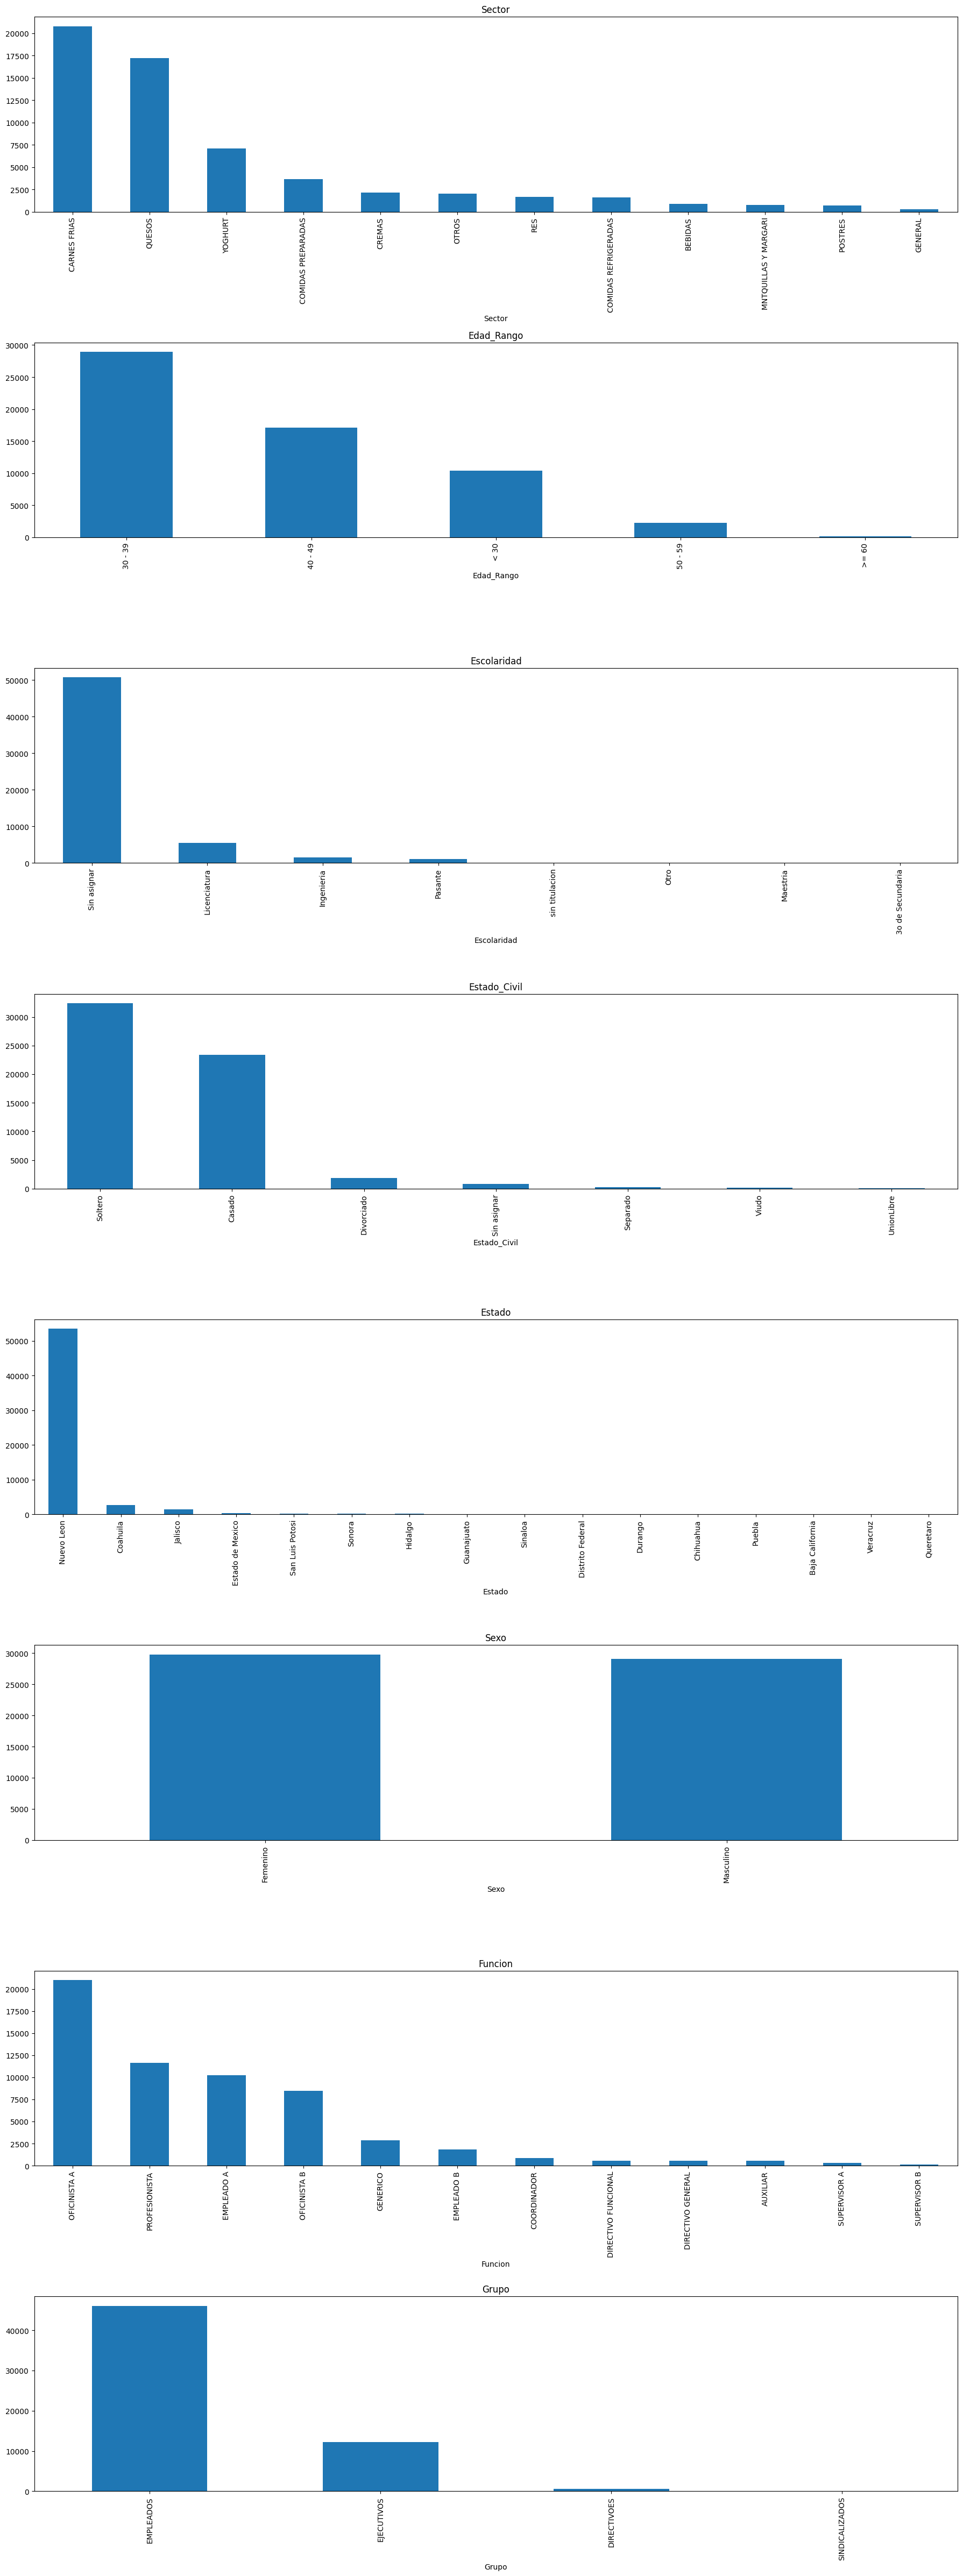

In [5]:
import matplotlib.pyplot as plt

# Lista de variables
variables = ['Sector','Edad_Rango','Escolaridad', 'Estado_Civil', 'Estado', 'Sexo', 'Funcion', 'Grupo']

# Número de gráficos por fila
num_cols = 1
num_rows = (len(variables) + num_cols - 1) // num_cols  # Calcula el número de filas necesarias

# Crear una figura con subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
axes = axes.flatten()  # Aplana el arreglo de ejes para iterar fácilmente

# Iterar sobre cada variable y crear un histograma
for i, var in enumerate(variables):
    df[var].value_counts().plot(kind='bar', ax=axes[i])  # Cambia a bar plot si es categórico
    axes[i].set_title(var)
    axes[i].tick_params(axis='x', rotation=90)  # Rotar los xticks a 90 grados

# Eliminar ejes vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


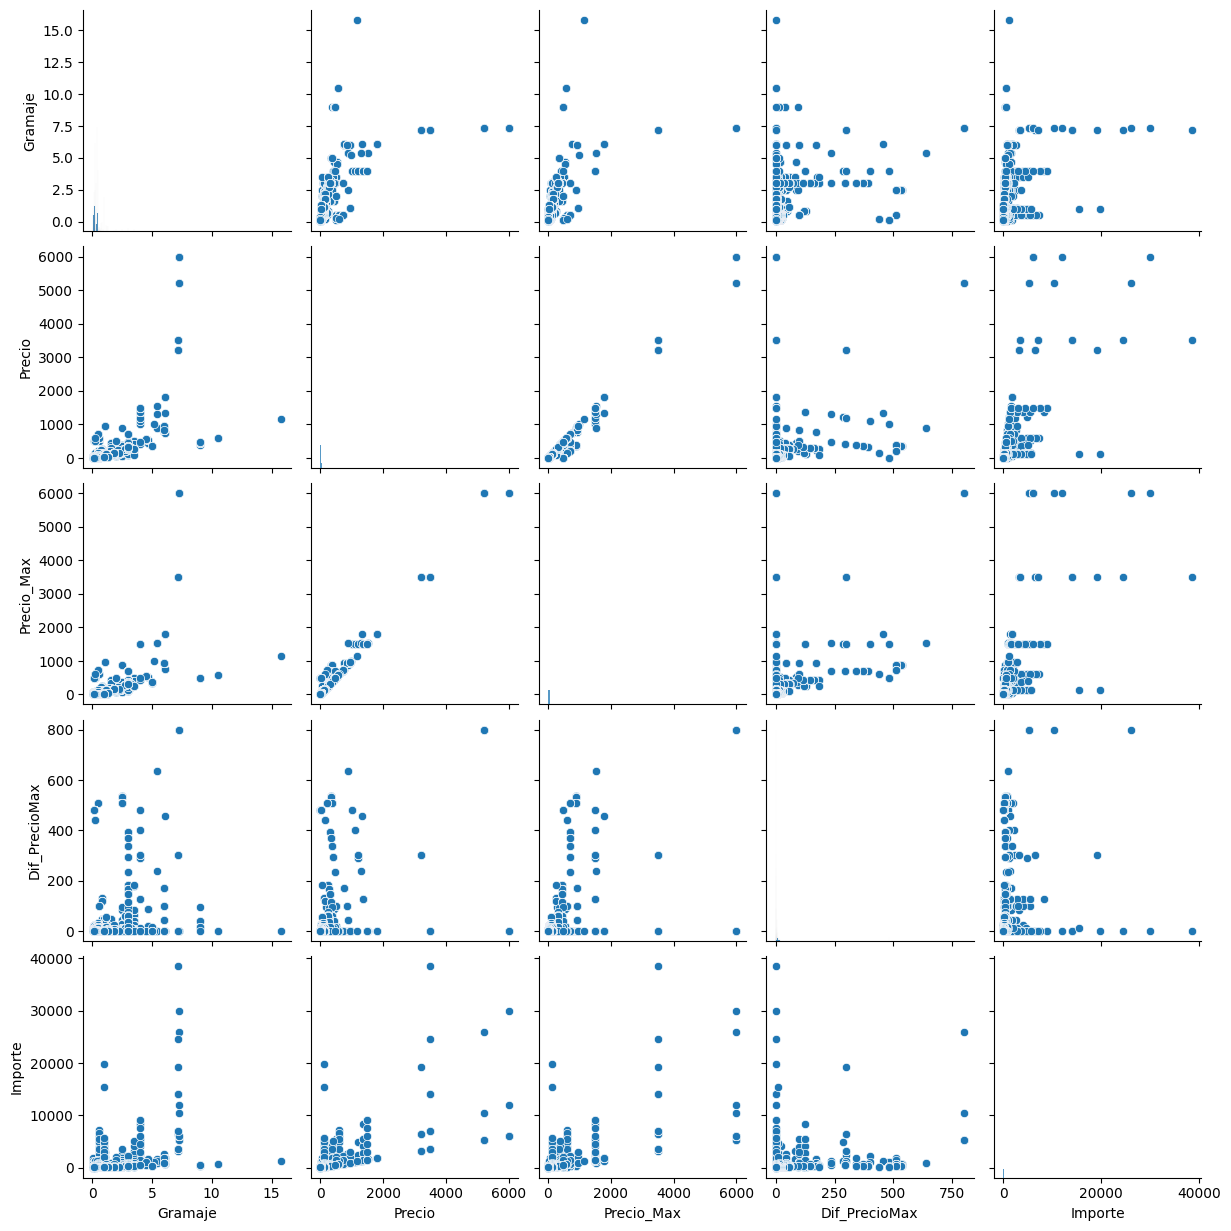

: 

In [7]:
df.select_dtypes(float)
import seaborn as sns
sns.pairplot(df[['Gramaje', 'Precio', 'Precio_Max', 'Dif_PrecioMax', 'Importe']])
plt.show()


### Selección de Variables

Los clientes de alto valor son aquellos que, en su historial de transacciones, tienen un importe total acumulado de compras dentro del 25% superior de todos los clientes y han realizado 30 o más compras. Esto significa que además de generar un alto volumen de ingresos, son clientes recurrentes.
* Variable objetivo:
Cliente_Alto_Valor: Binaria (1 = Cliente de alto valor, 0 = Cliente estándar).

In [6]:
temp_1 = df.groupby('Clave_Cliente')['Transaccion'].nunique().reset_index(name='cant_compras')

temp_2 = df.groupby(['Clave_Cliente','No._Hijos','Antiguedad','Edad','Estado_Civil','Estado','Sexo','Grupo']).agg(
    Importe_Total=('Importe', 'sum'),# Sumar el importe de todos los pedidos del cliente
    cant_productos=('Cantidad','sum')
).reset_index()
## Escolaridad, Edad_Rango, Funcion

In [7]:
# Merging both temp dataframes
cliente = pd.merge(temp_1,temp_2,on='Clave_Cliente',how='inner').drop(columns='Clave_Cliente')

# Reorder the columns
cliente = cliente[['cant_compras','Importe_Total', 'cant_productos', 'No._Hijos', 'Antiguedad',
                'Edad' , 'Estado_Civil', 'Estado', 'Sexo', 'Grupo']]
# Escolaridad, Edad_Rango, Funcion

In [8]:
#Umbral para clientes de alto valor (percentil 75)
umbral_alto_valor = np.percentile(cliente['Importe_Total'], 75)

# Crear la variable objetivo: 1 si el cliente es de alto valor y ha hecho más de 10 compras, 0 si no lo es
cliente['Cliente_Alto_Valor'] = np.where((cliente['Importe_Total'] >= umbral_alto_valor) & (cliente['cant_compras'] >= 25), 1, 0)

In [9]:
cliente.head()

,cant_compras,Importe_Total,cant_productos,No._Hijos,Antiguedad,Edad,Estado_Civil,Estado,Sexo,Grupo,Cliente_Alto_Valor
0,45,6791.96,250,0,15,35,Soltero,Nuevo Leon,Femenino,EMPLEADOS,0
1,40,6951.88,250,0,15,40,Soltero,Nuevo Leon,Masculino,EMPLEADOS,0
2,2,373.50,14,2,15,35,Casado,Nuevo Leon,Masculino,EMPLEADOS,0
3,2,328.00,8,0,15,57,Soltero,San Luis Potosi,Femenino,EMPLEADOS,0
4,49,12792.41,414,0,15,41,Soltero,Nuevo Leon,Femenino,EMPLEADOS,1


In [10]:
# Usar apply para agregar una columna calculada fila por fila
cliente['costo_por_compra']= cliente['Importe_Total']/cliente['cant_compras']
cliente['prod_por_compra']= cliente['cant_productos']//cliente['cant_compras']

In [11]:
# Seleccion de columnas para los modelos
cliente_4_model = cliente[['costo_por_compra','prod_por_compra','No._Hijos', 'Antiguedad', 'Edad', 'Estado_Civil', 'Sexo', 'Cliente_Alto_Valor']]
# estado, Grupo

In [12]:
cliente_4_model.head()

,costo_por_compra,prod_por_compra,No._Hijos,Antiguedad,Edad,Estado_Civil,Sexo,Cliente_Alto_Valor
0,150.932444,5,0,15,35,Soltero,Femenino,0
1,173.797000,6,0,15,40,Soltero,Masculino,0
2,186.750000,7,2,15,35,Casado,Masculino,0
3,164.000000,4,0,15,57,Soltero,Femenino,0
4,261.069592,8,0,15,41,Soltero,Femenino,1


In [13]:
## LabelEncoder en 'Estado_Civil','Estado','Sexo','Grupo'
lblencoder = LabelEncoder()
cliente_4_model.loc[:,'Estado_Civil'] = lblencoder.fit_transform(cliente_4_model['Estado_Civil'])
# cliente_4_model.loc[:,'Estado'] = lblencoder.fit_transform(cliente_4_model['Estado'])
cliente_4_model.loc[:,'Sexo'] = lblencoder.fit_transform(cliente_4_model['Sexo'])
# cliente_4_model.loc[:,'Grupo'] = lblencoder.fit_transform(cliente_4_model['Grupo'])

### 4. Modelos de Clasificación

In [14]:
x_train, x_test, y_train, y_test = train_test_split(cliente_4_model.drop(columns=['Cliente_Alto_Valor']),
                                                    cliente_4_model['Cliente_Alto_Valor'],
                                                    test_size=0.3)

#### 3.1 Decision Trees

In [15]:
model_1 = DecisionTreeClassifier(criterion='entropy',max_depth=5)

model_1.fit(x_train,y_train)
predictions_1 = model_1.predict(x_test)

Matriz de confusión:


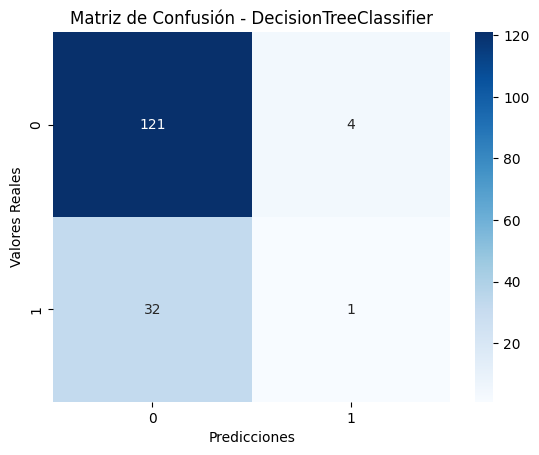

In [16]:
# Evaluar el modelo
print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, predictions_1)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title(f'Matriz de Confusión - {model_1.__class__.__name__}')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


In [17]:
# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, predictions_1))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       125
           1       0.20      0.03      0.05        33

    accuracy                           0.77       158
   macro avg       0.50      0.50      0.46       158
weighted avg       0.67      0.77      0.70       158



In [18]:
# model_1.feature_importances_
pd.DataFrame(index=model_1.feature_names_in_, data= {'importances':model_1.feature_importances_})

,importances
costo_por_compra,0.197794
prod_por_compra,0.378697
No._Hijos,0.000000
Antiguedad,0.367053
Edad,0.056456
Estado_Civil,0.000000
Sexo,0.000000


#### 3.4 Logistic Regresion

In [19]:
model_4 = LogisticRegression(solver='newton-cg',class_weight='balanced')
model_4.fit(x_train,y_train)

predictions_4 = model_4.predict(x_test)

Matriz de confusión:


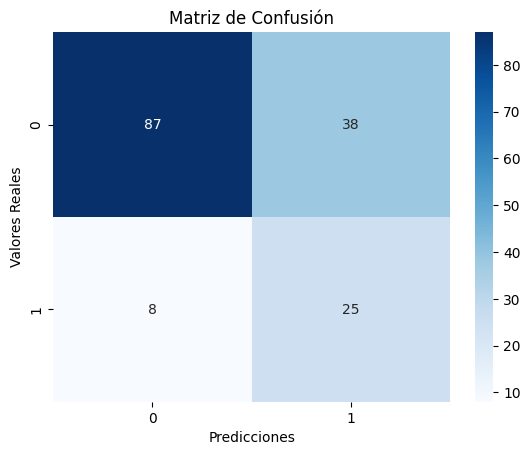

In [20]:
# Evaluar el modelo
print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, predictions_4)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [36]:
pd.DataFrame(data = {
    f'{model_4.classes_[0]}':model_4.predict_proba(x_test)[:,0],
    f'{model_4.classes_[1]}': model_4.predict_proba(x_test)[:,1]
})

,0,1
0,0.851066,0.148934
1,0.170466,0.829534
2,0.558640,0.441360
3,0.186222,0.813778
4,0.816968,0.183032
...,...,...
153,0.697971,0.302029
154,0.701415,0.298585
155,0.202171,0.797829
156,0.323818,0.676182


In [37]:
# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, predictions_4))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       125
           1       0.40      0.76      0.52        33

    accuracy                           0.71       158
   macro avg       0.66      0.73      0.66       158
weighted avg       0.81      0.71      0.73       158



#### 3.5 KNN

### 5. Evaluación de Modelos

#### ROC-Curve

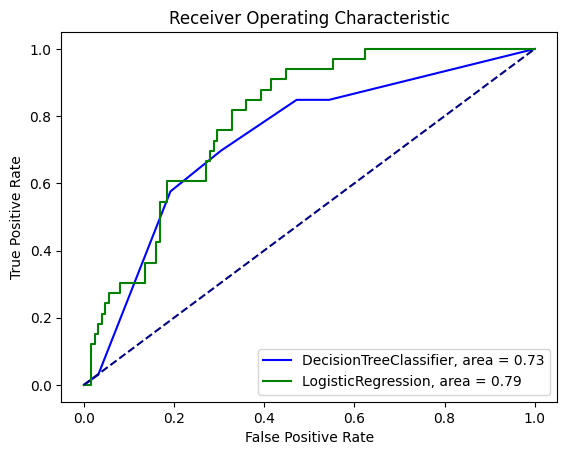

In [41]:
fpr_1, tpr_1, _ = roc_curve(y_test,model_1.predict_proba(x_test)[:,1])
# fpr_2, tpr_2, _ = roc_curve(y_test,predictions_2)
fpr_4, tpr_4, _ = roc_curve(y_test,model_4.predict_proba(x_test)[:,1])

roc_auc_1 = auc(fpr_1, tpr_1)
# roc_auc_2 = auc(fpr_2, tpr_2)
roc_auc_4 = auc(fpr_4, tpr_4)

plt.figure()
plt.plot(fpr_1, tpr_1, color='blue', label=f'{model_1.__class__.__name__}, area = {roc_auc_1:.2f}')
# plt.plot(fpr_2, tpr_2, color='blue', label=f'{model_2.__class__.__name__}, area = {roc_auc_2:.2f}')
plt.plot(fpr_4, tpr_4, color='green', label=f'{model_4.__class__.__name__}, area = {roc_auc_4:.2f}')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()